## IMPORTING MODULES


In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## LOADING THE DATASET

In [2]:
data = pd.read_csv(r"C:\Users\vijta\OneDrive\Documents\IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
#display the statistics of the data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# display number of samples on each class
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## PREPROCESSING THE DATA

In [9]:
#check for null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

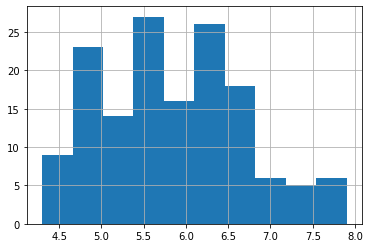

In [11]:
data['sepal_length'].hist()

<AxesSubplot:>

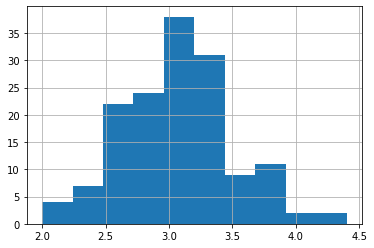

In [12]:
data['sepal_width'].hist()

<AxesSubplot:>

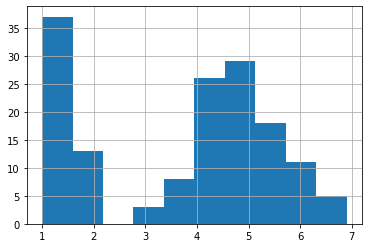

In [13]:
data['petal_length'].hist()

<AxesSubplot:>

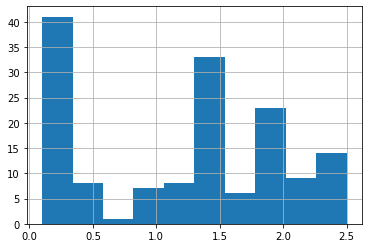

In [14]:
data['petal_width'].hist()

In [15]:
#scatterplot
colors = ['red','orange','blue']
species = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

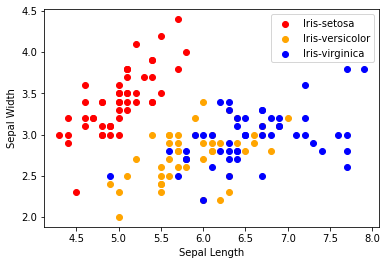

In [17]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

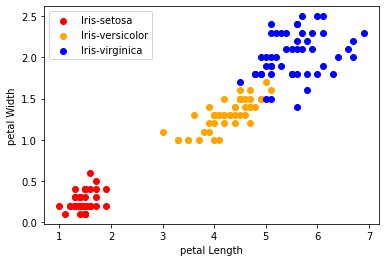

In [18]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

## correlation matrix


In [19]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

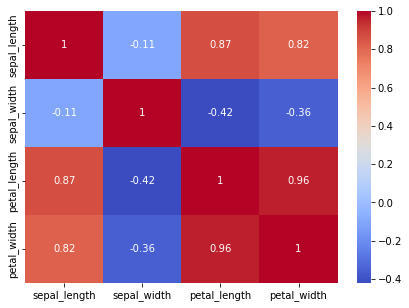

In [22]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'coolwarm')

## LABEL ENCODING


In [24]:
Label_Encode = LabelEncoder()

In [26]:
data['species'] = Label_Encode.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## TRAIN TEST SPLIT

In [52]:
X = data.drop(columns='species', axis=1)
Y = data['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

## MODEL

In [53]:
#logistic regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [54]:
# print metric to get performance
print("Accuracy: ", model.score(X_test,Y_test)*100)

Accuracy:  97.77777777777777


In [55]:
Y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.97
Mean Absolute Error: 0.02
Mean Squared Error: 0.02
Root Mean Squared Error: 0.15
